Mean Squared Error: 47.5081


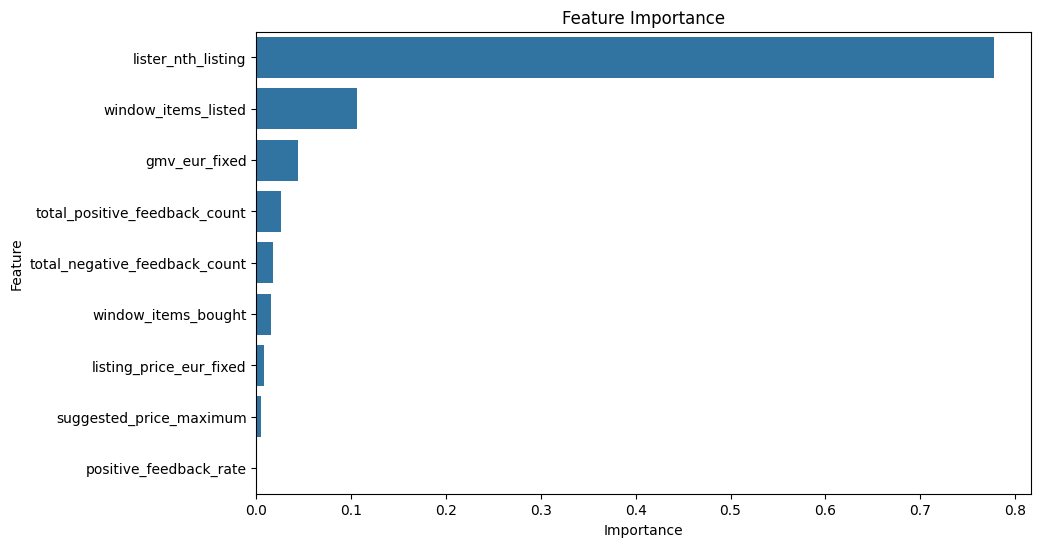

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('filtered_dataset.csv')

# Calculate positive feedback rate
df['positive_feedback_rate'] = df['total_positive_feedback_count'] / (df['total_positive_feedback_count'] + df['total_negative_feedback_count'])

# Features to keep
features_to_keep = [
    'listing_price_eur_fixed',
    'gmv_eur_fixed',
    'suggested_price_maximum',
    'lister_nth_listing',
    'total_positive_feedback_count',
    'total_negative_feedback_count',
    'window_items_listed',
    'window_items_bought',
    'window_items_sold',
    'positive_feedback_rate'
]

# Ensure all required features are in the dataframe
df = df[features_to_keep]

# Separate features and target variable
X = df.drop(columns=['window_items_sold'])
y = df['window_items_sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Get feature importance
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()